# Introduction to Simple Linear Regression


## Learning Objectives and outcomes

- Introduction of linear regression in the simple setting.

- Basic assumptions of the model.

- Terminology - 'intercept', 'coefficient'.

- The Least Square method.
    
- Implement linear regression in sklearn.




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# read data to a dataframe
data = pd.read_csv('data/ISLR-Auto/Advertising.csv')[['TV', 'Sales']]

print(data.shape)
data.head()

(200, 2)


,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


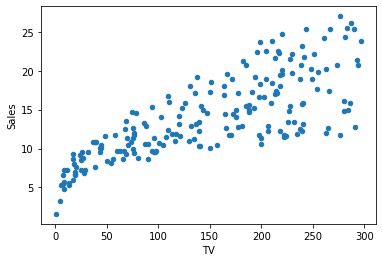

In [3]:
## plot data
data.plot(kind = 'scatter', x = 'TV', y= 'Sales')
plt.show()

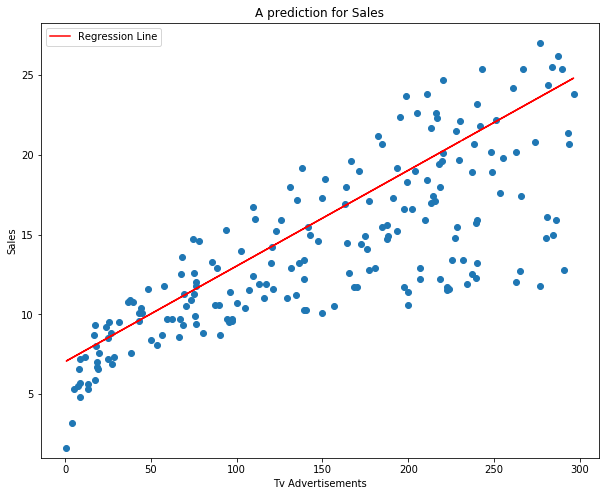

In [4]:
def draw_line(X,
              y,
              intercept = 7, 
              slope = 0.04, 
              xlabel = 'Tv Advertisements', 
              ylabel = 'Sales', 
              title = 'A prediction for Sales'):
    
    """
    draws a line with given intercept and slope together with given data.
    parameters:
    X: array
    y: array
    intercept: float, preferably between 5 and 9 in this case
    slope: float, preferably between 0.02 and 0.08
    xlabel: str, label of the x-axis in the figure.
    ylabel: str, label of the y-axis in the figure.
    return: a figure with data and a regression line with given intercept and slope.
    """
    # find the predicted values. These points lie on the line with 
    # given slope and intecept
    y_pred = intercept + slope * X

    # create a new figure and set the figure size  
    plt.figure(figsize= (10,8))
    
    # plot data points as scatter
    plt.scatter(x= X, y= y)
    
    # plot the prediction line
    plt.plot(X, y_pred, c= 'r', label = 'Regression Line')
    
    plt.ylim(bottom=1)

    # set labels
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # set the title of the figure
    plt.title(title)
    
    plt.legend()
    plt.show()
    return 

tv = data.TV.values
sales = data.Sales.values
draw_line(tv, sales, intercept = 7.03, slope= 0.06 )

In [17]:
# Formula: yhat i = b1xi + b0

b_0 = 6

b_1 = 0.06

# checking where f(x) = 105
x_105 = data.Sales.loc[105]
print("f(x) = 105", x_105)

# Checking where f(105)
y_105 = data.Sales.loc[105]
print("f(105):", y_105)

# Looking at the vector of y hat 105
y_hat_105 = (b_1 * x_105) + b_0
print("yhat:", y_hat_105)

f(x) = 105 19.2
f(105): 19.2
yhat: 7.152


In [26]:
y_105 = data.Sales.loc[105]
e_105 = y_105 - y_hat_105  # Looking at the error index

# Function that finds the error index
def error(b0, b1, index):
    x_index = data.TV.loc[index]
    y_index = data.Sales.loc[index]
    
    y_hat = b0 + (b1 * x_index)
    return np.abs(y_hat - y_index)

print(error(b0=6, b1=0.06, index=105))

-4.925999999999998


In [38]:
def total_error(data, b0, b1):
    """Finds individual errors and sums them together"""
    error_list = []
    for index in range(1, len(data.TV)):
        error_index = error(b0=b0, b1=b1, index=index)
        error_list.append(error_index)
    total_error = np.sum(error)
    return total_error

total_error(data=data, b0=6, b1=0.06)

<function __main__.error(b0, b1, index)>

In [39]:
# Writting the same function, total_error, without using a for loop

<function __main__.error(b0, b1, index)>

## Assumptions

* Assume $\mbox{Sales} \approx \mbox{TV}$  linearly.

* There is an initial value (baseline) of the Sales. 

* Data might not be fit on a line but the errors are random.

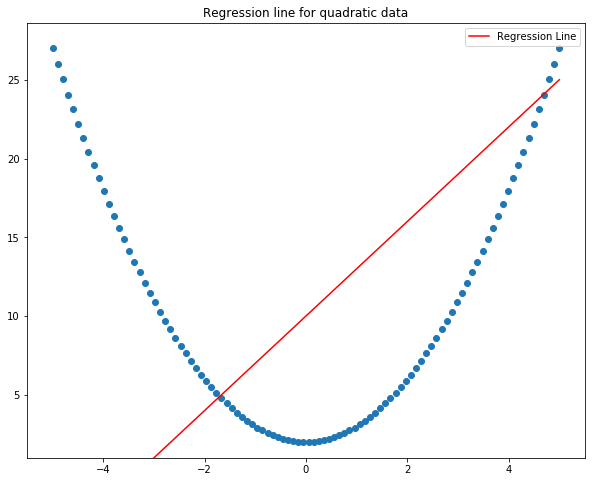

In [26]:
## Sometimes linearity assumption is too strict

expr_x = np.linspace(-5, 5,100)
y = expr_x**2 + 2
draw_line(expr_x, y, intercept= 10, slope = 3,
          xlabel= '',
          ylabel = '', 
          title = 'Regression line for quadratic data')

## Model  - Single Variable Case

- In simple linear regression we assume that if we would have population of both X and y variables then we would see the following relation:

$$ Y = b_{0} + b_{1}X + \epsilon$$
 
- $ b_{0}, b_{1}$ are parameters of the model and called the intercept and coefficient of the linear model respectively. 

- $\epsilon$ is the irreducible error term. Depend on the problem at hand we might assume that these errors are coming from measurement mistakes, personal beliefs, recording errors, etc.

- Our goal is given samples from X and y, try to find estimates $\hat{b}_{0}$ and $\hat{b}_{1}$ for population parameters $b_{0}$ and  $b_{1}$
- Once we find such estimates we can use them for future predictions: $\hat{b}_{0}$ and $\hat{b}_{1}$ we will make a prediction:

$$ \hat{y}_{i} = \hat{b}_{0} + \hat{b}_{1} x_{i} $$

<img src="best_fit.png" cap="Transformed dataset"  width='300'/>

## Using Sklearn for simple linear regression

- Fitting a regression model is very easy with python. 

- All we have to do is importing LinearRegression class from sklearn.linear_model module

- For more details and examples of implementation you can check:

[Sklearn Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

__Your Turn!__

- Now using 'tv' and 'Sales' try to fit a linear model with sklearn. Find the corresponding intercept and slope values.

In [29]:
X = data.TV.values
y = data.Sales.values

In [30]:
X.shape

(200,)

In [31]:
X = X.reshape(-1, 1)

X.shape

(200, 1)

In [32]:
# from sklearn.linear_model import LinearRegression

# lr = LinearRegression()

# lr.fit(X,y)

# lr.coef_

# lr.intercept_

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
# import LinearRegression class

from sklearn.linear_model import LinearRegression

# instantiate the class
# check parameters

lr = LinearRegression()

# now fit the data
# note that in sklearn this procedure is very standard
# but before we should reshape X
print('Shape of X before reshape:', X.shape)
X = X.reshape(-1,1)
print('Shape of X after reshape:', X.shape)
# when you fit model learns b0_hat and b1_hat
lr.fit(X,y)

# now we can use fitted object lr to get parameters or learn parameters

print(lr.intercept_, lr.coef_)

Shape of X before reshape: (200, 1)
Shape of X after reshape: (200, 1)
7.032593549127693 [0.04753664]


## Difference between $b_0, b_1$ vs $\hat{b}_{0}, \hat{b}_{1}$

- To clarify the difference between population parameters and the estimates from data we will work with simulated data in this section.

In [35]:
# Here we will work with a toy case
# note that y~ 3X + 5 so we know population parameters in this case. 
# irr_error is random error due to some measurement errors.

X = np.random.uniform(low = 0, high = 10, size = 100)
irr_error = np.random.normal(loc= 0, scale = 1, size = 100)

y = 3*X + 5 + irr_error

__Your Turn!__ Use sklearn to fit 100 linear model for the data X, y above. Don't forget to add random error each time. The idea is each time we sample from a population we will have some variation inevitably.

In [48]:
# %load -r 35-48 supplement.py

Now let's look at distributions of $\hat{b}_{0}$ and $\hat{b}_{1}$:

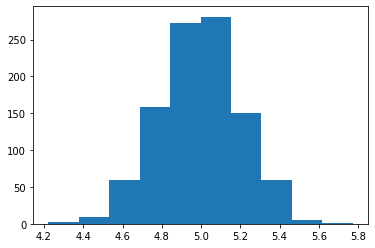

In [20]:
plt.hist(coef_list_b0)
plt.title("Histogram for the distribution of $\widehat{b}_{0}$")
plt.xlabel("Value of $\widehat{b}_{0}$ for each different sample of size 100")
plt.show()

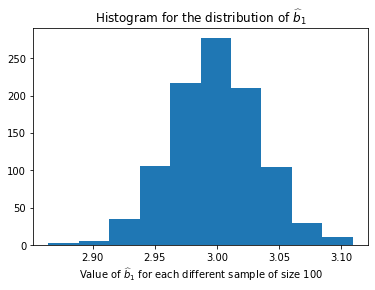

In [45]:
plt.hist(coef_list_b1)
plt.title("Histogram for the distribution of $\widehat{b}_{1}$")
plt.xlabel("Value of $\widehat{b}_{1}$ for each different sample of size 100")
plt.show()

## How do we find an estimator? Least Squares method.
<a name="least_squares">
</a>

__Q: How to find 'best' line?__


<img src="errors.png" cap="Transformed dataset"  width='500'/>



* Recall that we know actual values $y$ for the sales and for given coefficients $b_{0}, b_{1}$ we can make a prediction $\hat{y}$. 

* Error for each prediction $e_{i} = y_{i} - \hat{y_{i}}$



### Residual sum of squares (RSS)


$$RSS = e_{1}^{2} + e_{2}^{2} + \cdots + e_{n}^{2}$$

* Wait a minute! Why do we get the squares?


The least square method minimizes the RSS.

* Good news: The least square can be calculated exactly because it has a closed form:

$$ \mbox{RSS} = (y_1 - \hat{b}_{0} -\hat{b}_{1}x_{1} )^{2} + (y_2 - \hat{b}_{0} -\hat{b}_{1}x_{2} )^{2} + \cdots + (y_n -\hat{b}_{0} -\hat{b}_{1}x_{n} )^{2}$$

* Bad news: It requires derivatives and is complicated to derive. But no worries, python will take care of this step for us.

$$ \hat{b}_{1} = \dfrac{\sum^{n}_{i=1} (x_i - \bar{x})(y_{i}-\bar{y})}{\sum^{n}_{i=1} (x_i - \bar{x})^{2}}$$

and 

$$ \hat{b}_{0} = \bar{y} - \hat{b}_{1}\bar{x} $$

- __Note:__ In the literature you might see some variants of RSS: Some of which are:

$$ \mbox{Mean Squared Errors (MSE)} = \frac{1}{N} \mbox{RSS}$$

$$ \mbox{Root Mean Squared Errors (RMSE)} = \sqrt{\frac{1}{N} \mbox{RSS}} $$


__Your Turn!__

Write a function that for given X,y data it returns $\hat{b}_{0}$ and $\hat{b}_{1}$ and RSS for this data. Compare the results with sklearn's results.


In [46]:
# %load -r 1-9 supplement.py


In [49]:
least_squares(X,y)

## returns b0, b1 and RSS

(7.032593549127698, 0.047536640433019736, 2102.5305831313512)

Now use statsmodel or sklearn to compare results.

In [118]:
X = X.reshape(-1,1)

In [119]:
lr = LinearRegression()

lr.fit(X,y)
print(lr.intercept_, lr.coef_)

4.933731524198661 [3.01620068]


In [53]:
## let's use draw_line again for the given estimates.

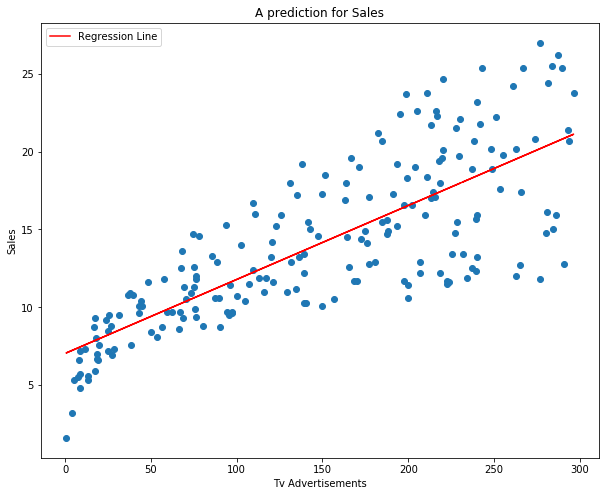

In [50]:
draw_line(X, y, intercept= 7.03259, slope= 0.0475366)

## Linear Regression with Statsmodel

There is another library that we can use for linear models which is Statsmodel.

- [check the documentation](http://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS)

- Now let's use statsmodel to fit a linear model to our data.

In [53]:
import statsmodels.api as sm

__Your Turn__

- Try to use statsmodel library to fit a line to the advertising dataset.

In [54]:
# %load -r 51-54 supplement.py
X = sm.add_constant(X)
model = sm.OLS(y,X, hasconst=True)
results = model.fit()
results.summary()

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 03 Jan 2020   Prob (F-statistic):           1.47e-42
Time:                        11:19:45   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[Exit Ticket For Linear Regression](https://docs.google.com/forms/d/e/1FAIpQLSeT7PVTJahvDiyUqHMpvjDgIe2cUY99NJy0hSDb5omCk2zprw/viewform)

## Further Reading <a name='further_reading'></a>

- [What is the parameter copy_X in sklearn](https://stackoverflow.com/questions/52541717/what-is-the-parameter-copy-x-in-sklearn-linear-regression)

- https://newonlinecourses.science.psu.edu/stat501/node/252/

- https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

- https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

- https://lagunita.stanford.edu/assets/courseware/v1/e4f2f4823252ead8c1a68722e3415c28/c4x/HumanitiesSciences/StatLearning/asset/linear_regression-handout.pdf